In [1]:
import numpy as np
from pprint import pprint
from matplotlib import pyplot as plt

## Needleman  - Wunsch

Implementación del algoritmo NW. Los valores para gap, msm y mth se especifican a continuación.
La matriz de comparación $\delta$ se usará la que se presenta a continuación.

| $\delta$ | a | b | 
|-----|----|--- |
|**a**| eps| mu | 


In [2]:
class NW(object):
    def __init__(self, u, v, mu = 1, nu = -1, sigma = -2):
        self._u = u
        self._v = v
        self._S = np.zeros((len(u)+1, len(v)+1))
        self._B = np.zeros_like(self._S)
        self._m = mu
        self._n = nu
        self._sigma = sigma
        
    def delta(self, x, y):
        return self._m if x==y else self._n
    
    def __direccion(self,L):
        '''
        Regresa la la dirección a partir 
        del valor máximo en L
        '''
        mx = max(L)
        cod = 0
        idxs = [i for i,j in enumerate(L) if j==mx]
        if(len(idxs)==1):
            # si la lista mide 1 entonces el max es la entrada i 
            # la regresamos +1 (0->1, 1->2, 2->3)
            cod = idxs[0]+1
        else:
            # 
            cod = sum([i+1 for i in idxs]) + 1
        return mx, cod
    
    def _entrada(self,i,j):
        '''
        Se calcula la entra i,j 
        '''
        sigma = self._sigma
        arriba    = self._S[i-1,  j] + sigma
        izquierda = self._S[i  ,j-1] + sigma
        u,v       = self._v[i-1], self._u[j-1]
        valdelta  = self.delta(u,v)
        match     = S[i-1,j-1] + valdelta
        ## valor de donde viene el maximo
        return self.__direccion([arriba,izquierda,match])
    
    def calcula_alineamiento(self):
        '''
        Se calcula el interior de la matriz
        '''
        U,V, sigma = self._u, self._v, self._sigma
        print(U, len(U)+1)
        print(V)
        S, B = self._S, self._B
        print(S)
        # condicion inicial
        for i in range(1,len(U)+1):
            S[i,0], B[i,0] = S[i-1,0] - sigma, 1  #siempre de arriba
        for j in range(1,len(V)+1):
            S[0,j], B[0,j] = S[0,j-1] - sigma, 2  #siempre de la izq
        
        # interior de la matriz
        for i in range(1,len(V)+1):
            for j in range(1,len(U)+1):
                self._S[i,j], self._B[i,j] = self._entrada(i,j)
        return self._S, self._B
    
    @property
    def score(self):
        return self._S
    
    @property
    def dirs(self):
        return self._B
    
# instanciamos y probamos
alineador = NW( u='CAG',v='CAAC')
alineador.calcula_alineamiento()

CAG 4
CAAC
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


NameError: name 'S' is not defined

In [5]:
mu    = -1  #mismatch
eps   =  2  #match
sigma = -2  #gap

def delta(u,v,msm=mu,mth=eps):
    if(u==v):
        return mth
    else:
        return msm
#ejemplo
pprint(delta('g','g'))
pprint(delta('g','t'))

2
-1


La matriz de scores $S$ se llena con la funcion $s_{i,j}$ como se presenta a continuación



\begin{align}
S_{i,j} (u_i,v_j) & = \max \left \{ \begin{array} {ll}
                                    S_{i-1,j} - \sigma \\
                                    S_{i,j-1} - \sigma \\
                                    S_{i-1,j-1} + \delta (u_i,v_j) \\
                        \end{array} \right .
\end{align}



In [6]:
def direccion(l):
    mx = max(l)
    idxs = [i for i,j in enumerate(l) if j==mx]

    if(len(idxs)==1):
        cod = idxs[0]+1
    else:
        cod = sum([i+1 for i in idxs]) + 1
    assert cod>0, f"Error para {l}"
    return mx, cod

def entrada(S,i,j,V,U,mu=mu, eps=eps,sigma=sigma,delta=delta):
    arriba    = S[i-1,  j] + sigma
    izquierda = S[i  ,j-1] + sigma
    u,v       = V[i-1], U[j-1]
    valdelta  = delta(u,v, msm=mu, mth=eps)
    match     = S[i-1,j-1] + valdelta
    #print(valdelta, match)
    ## entrada de la matriz
    l         = [arriba, izquierda, match]
    ## valor de donde viene el maximo
    return direccion(l)

direccion([4,9,9])
#direccion([-5,-3,0])

(9, 6)

Para esto requerimos hacer un par de matrices, a saber S y B

In [7]:
#V = 'ATCGTAC'# |V| = n      filas
#U= 'ATGTTAT'   # |U| = m    columnas
#V, U = 'CTA', 'CTAA'
def muta(c1, p=0.01, alfabeto = list('ACGT'), tipo='lista'):
    r = []
    for a in c1:
        if(np.random.random()<=p):
            r.append(np.random.choice(alfabeto))
        else:
            r.append(a)
    return ''.join(r) if tipo=='string' else r

U = [np.random.choice(list('ACGT')) for _ in range(1000)]
V = muta(U, p=0.01)
#V = U[:100] + muta(U[101:800], p=0.01) + U[801:]
#V = muta(U[:100], p=0.5) + list(muta(U[101:800], p=0.01)) + muta(U[801:], p=0.5)

S = np.zeros((len(V)+1,len(U)+1))
B = np.zeros_like(S)
pprint(S)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])


El algoritmo pide llenar la primer fila y primer columna

1)
```
for i=1..|V|
    S[i,0] = S[i-1,0] - s
```

2)
```
for j=1..|V|
    S[0,j] = S[0,j-1] - s
```


In [8]:
for i in range(1,len(V)+1):
    S[i,0], B[i,0] = S[i-1,0] - eps, 1
for j in range(1,len(U)+1):
    S[0,j], B[0,j] = S[0,j-1] - eps, 2
pprint(S)
pprint(B)

array([[    0.,    -2.,    -4., ..., -1996., -1998., -2000.],
       [   -2.,     0.,     0., ...,     0.,     0.,     0.],
       [   -4.,     0.,     0., ...,     0.,     0.,     0.],
       ...,
       [-1996.,     0.,     0., ...,     0.,     0.,     0.],
       [-1998.,     0.,     0., ...,     0.,     0.,     0.],
       [-2000.,     0.,     0., ...,     0.,     0.,     0.]])
array([[0., 2., 2., ..., 2., 2., 2.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])


Desupués rellenamos el contenido de la matriz

In [9]:
for i in range(1,len(V)+1):
    for j in range(1,len(U)+1):
        S[i,j], B[i,j] = entrada(S,i,j,V,U)

In [11]:
V

['G',
 'T',
 'C',
 'A',
 'T',
 'C',
 'C',
 'T',
 'A',
 'G',
 'C',
 'A',
 'T',
 'T',
 'G',
 'A',
 'T',
 'G',
 'T',
 'A',
 'A',
 'C',
 'C',
 'G',
 'A',
 'T',
 'C',
 'T',
 'A',
 'A',
 'T',
 'T',
 'T',
 'T',
 'A',
 'C',
 'A',
 'A',
 'T',
 'C',
 'G',
 'G',
 'C',
 'C',
 'C',
 'C',
 'A',
 'G',
 'T',
 'C',
 'C',
 'T',
 'T',
 'A',
 'G',
 'G',
 'C',
 'G',
 'G',
 'T',
 'G',
 'C',
 'C',
 'A',
 'G',
 'T',
 'C',
 'G',
 'T',
 'C',
 'T',
 'A',
 'A',
 'G',
 'T',
 'T',
 'A',
 'G',
 'C',
 'A',
 'G',
 'G',
 'A',
 'C',
 'G',
 'T',
 'G',
 'T',
 'T',
 'G',
 'C',
 'C',
 'A',
 'T',
 'C',
 'G',
 'C',
 'C',
 'G',
 'G',
 'T',
 'C',
 'T',
 'T',
 'T',
 'G',
 'C',
 'T',
 'T',
 'C',
 'T',
 'C',
 'A',
 'C',
 'T',
 'T',
 'G',
 'T',
 'T',
 'T',
 'T',
 'T',
 'A',
 'C',
 'T',
 'G',
 'C',
 'T',
 'T',
 'T',
 'A',
 'A',
 'G',
 'C',
 'C',
 'A',
 'T',
 'G',
 'T',
 'G',
 'T',
 'C',
 'G',
 'T',
 'G',
 'G',
 'T',
 'G',
 'G',
 'A',
 'T',
 'T',
 'G',
 'C',
 'A',
 'G',
 'C',
 'C',
 'A',
 'A',
 'A',
 'A',
 'C',
 'C',
 'G',
 'A',
 'T'

In [10]:
pprint(S)

array([[    0.,    -2.,    -4., ..., -1996., -1998., -2000.],
       [   -2.,     2.,     0., ..., -1992., -1994., -1996.],
       [   -4.,     0.,     4., ..., -1988., -1990., -1992.],
       ...,
       [-1996., -1992., -1988., ...,  1969.,  1967.,  1965.],
       [-1998., -1994., -1990., ...,  1967.,  1971.,  1969.],
       [-2000., -1996., -1992., ...,  1965.,  1969.,  1973.]])


In [114]:
pprint(B)

array([[0., 2., 2., ..., 2., 2., 2.],
       [1., 3., 2., ..., 6., 2., 2.],
       [1., 1., 3., ..., 2., 2., 2.],
       ...,
       [1., 5., 1., ..., 5., 3., 6.],
       [1., 5., 1., ..., 3., 7., 3.],
       [1., 5., 1., ..., 5., 3., 7.]])


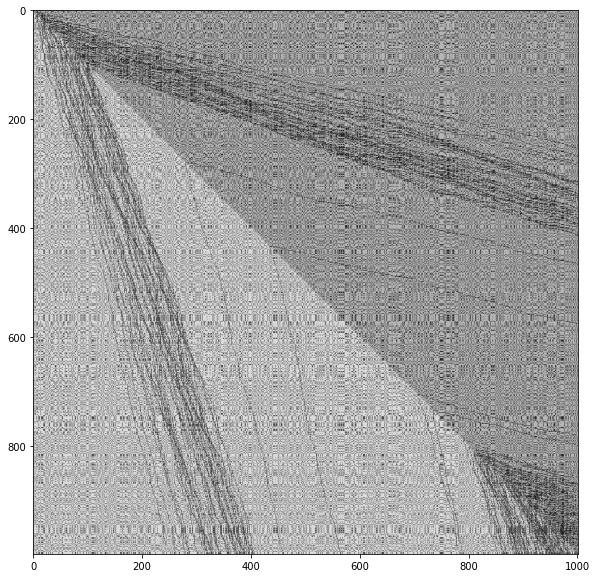

In [115]:
fig = plt.figure(figsize=(10,10))
plt.imshow(B, cmap='binary')

In [83]:
B[-1]

array([1., 1., 1., ..., 1., 5., 3.])

## Ejercicio

1. Proveer el alineamiento de las secuencias CTA con CTAG